In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
#import seaborn as sns
import os
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import random
from random import seed
from random import randint

In [2]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM
from sklearn.utils import shuffle
#import sys
import shap

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [3]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [4]:
params = {}

In [5]:
## Change to the 'Datasets directory'
gold_col = 'GOLDAMGBDollarD228NLBM'#  'Gold-T+1''GOLD_shift'
initial_dir = os.getcwd()
data_path = os.path.join(os.getcwd(), "data")

In [6]:
parameter_list = ['Fed Debt_Total Public Debt as Perc of GDP', 'Industrial Production_Manufacturing (NAICS)',  'Unemployment_Rate', 'Households and Nonprofit Organizations_Total Assets', 'Corp_Total Assets', 'All Employees, Retail Trade', 'IndustrialProductionGoldSilver21222S']
none_list = ['FEDFUNDS', 'Federal Debt Held by Federal Reserve Banks', 'Total Vehicle Sales', 'New Private Housing Units Authorized by Building Permits']
parameter_list

['Fed Debt_Total Public Debt as Perc of GDP',
 'Industrial Production_Manufacturing (NAICS)',
 'Unemployment_Rate',
 'Households and Nonprofit Organizations_Total Assets',
 'Corp_Total Assets',
 'All Employees, Retail Trade',
 'IndustrialProductionGoldSilver21222S']

In [7]:
## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y.csv'), index_col=0).sample(frac=1, random_state=1)
## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x.csv'), index_col=0).sample(frac=1, random_state=1).filter(parameter_list, axis=1)
test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y.csv'), index_col=0).sample(frac=1, random_state=1)

In [8]:
## Initialise Scalars so that data is normalised to 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
## Normalise the data using the scalar.
X_train = sc_x.fit_transform(train_X)
x_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

In [9]:
## Calculate the number of input 'test' columns.
input_neuron = len(test_x.columns)

In [321]:
## Setup the model for training, parameters here can and should be adjusted to create the best model.
classifier = Sequential()
classifier.add(Dense(output_dim = 250, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 75, init = 'uniform', activation = 'relu'))

classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
#classifier.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'Nadam', loss = 'mean_squared_error', metrics = ["mae"])
## '.fit' starts the training. 30 seconds to 2 minutes to run.
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000, validation_split= 0.2)


Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=250, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=75, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`


Train on 494 samples, validate on 124 samples
Epoch 1/1000
494/494 [==============================] - 1s 2ms/step - loss: 0.4092 - mae: 0.4025 - val_loss: 0.0829 - val_mae: 0.2229
Epoch 2/1000
494/494 [==============================] - 0s 358us/step - loss: 0.0695 - mae: 0.1830 - val_loss: 0.1102 - val_mae: 0.2186
Epoch 3/1000
494/494 [==============================] - 0s 354us/step - loss: 0.0644 - mae: 0.1724 - val_loss: 0.0746 - val_mae: 0.1828
Epoch 4/1000
494/494 [==============================] - 0s 422us/step - loss: 0.0600 - mae: 0.1644 - val_loss: 0.1042 - val_mae: 0.2054
Epoch 5/1000
494/494 [==============================] - 0s 325us/step - loss: 0.0556 - mae: 0.1601 - val_loss: 0.0688 - val_mae: 0.2027
Epoch 6/1000
494/494 [==============================] - 0s 309us/step - loss: 0.0571 - mae: 0.1652 - val_loss: 0.0596 - val_mae: 0.1765
Epoch 7/1000
494/494 [==============================] - 0s 367us/step - loss: 0.0529 - mae: 0.1581 - val_loss: 0.0703 - val_mae: 0.1988
Epoc

In [317]:
"""model_path = os.path.join(os.getcwd(), "model")
# Check if the relevant folders exist and create them if not
if os.path.exists(model_path) is False:
    os.mkdir(model_path)
# Export the model for future use to that you don't need to spend time training the model again
pickle.dump(classifier, open(os.path.join(model_path, "ReinNN_Nadam.pkl"), "wb"))"""

'model_path = os.path.join(os.getcwd(), "model")\n# Check if the relevant folders exist and create them if not\nif os.path.exists(model_path) is False:\n    os.mkdir(model_path)\n# Export the model for future use to that you don\'t need to spend time training the model again\npickle.dump(classifier, open(os.path.join(model_path, "ReinNN_Nadam.pkl"), "wb"))'

In [10]:
"""model_path = os.path.join(os.getcwd(), "model")
# Import the exported model in future runs using the greyed out line below (remove the hastag)
classifier = pickle.load(open(os.path.join(model_path, "ReinNN_SGD_AllData.pkl"), "rb"))"""

In [206]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.DeepExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_train)

In [256]:
names= train_X.columns.to_list()
names = ['fed debt % GDP', 'Ind. Production', 'Unemployment', 'Household Asset', 'Corp assets' 'Retail jobs', 'Gold prod' , 'Intr rate', 'Fed Debt', 'Vehicle Sales', 'New housing']
# 

In [208]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train[0,:], parameter_list)#, matplotlib=True)

In [209]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train, names, show=True)
#plt.savefig('scratch.png', dpi=300)

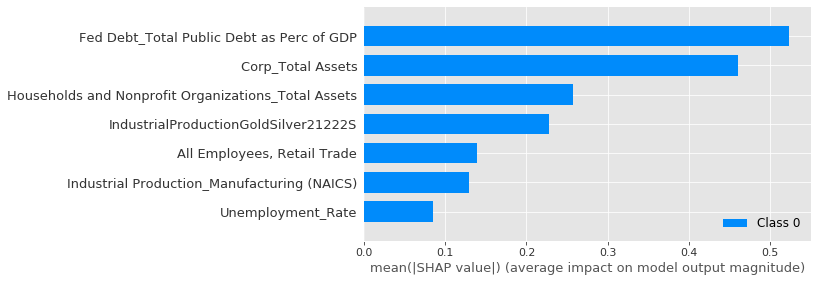

In [210]:
shap.summary_plot(shap_values, X_train, parameter_list, plot_type="bar", show=False)
#plt.savefig('SHAP_Feature_Score_600dpi.png',format = "png",dpi = 600,bbox_inches = 'tight')

In [104]:
# Calculate the predicted deaths according to the neural net model
test_x["gold_pred"] = sc_y.inverse_transform(classifier.predict(x_test))
# Calculate the predicted deaths according to the neural net model
train_X["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_train))
#df1 = pd.concat([test_x, train_X], axis=1)
df= train_X.merge(train_y,left_index=True, right_index=True)
# We merge the test dataframes together
df1 = test_x.merge(test_y[gold_col], left_index=True, right_index=True)
# We append the test data to the train data
df = df.append(df1)

# Again read in the 'covid19_df' as df_global
df_global = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_fit.csv"), index_col=0)
# Merge in the 'deaths_pred' prediction column to compare to the real data
df_global = df_global.merge(df["gold_pred"], left_index=True, right_index=True, how='left')
df_global.index = pd.to_datetime(df_global.index)

In [105]:
## Read in and merge the 'high' and 'low' dataframes to capture the spread of uncertainty.
high_train = pd.read_csv(os.path.join(data_path, "test", "df_train_high.csv"), index_col=0).filter(parameter_list, axis=1)
low_train = pd.read_csv(os.path.join(data_path, "test", "df_train_low.csv"), index_col=0).filter(parameter_list, axis=1)
# Re-scale training data
train_high = sc_x.transform(high_train)
train_low = sc_x.transform(low_train)
# Calculate the predicted deaths according to the active model.
high_train["gold_pred_high"] = sc_y.inverse_transform(classifier.predict(train_high))
low_train["gold_pred_low"] = sc_y.inverse_transform(classifier.predict(train_low))
# Merge in the gold prediction into the 'df_global' dataframe
df_global = df_global.merge(high_train["gold_pred_high"], left_index=True, right_index=True, how='left')
df_global = df_global.merge(low_train["gold_pred_low"], left_index=True, right_index=True, how='left')

In [106]:
# Compute the prediction error
df_global['gold_pred_error'] = df_global[gold_col] - df_global['gold_pred']
# Compute the cumulative error for gold
df_global['cumulative_error'] = df_global['gold_pred_error'].cumsum()

In [107]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 18,
         'axes.labelsize': 22,
         'axes.titlesize': 24,
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

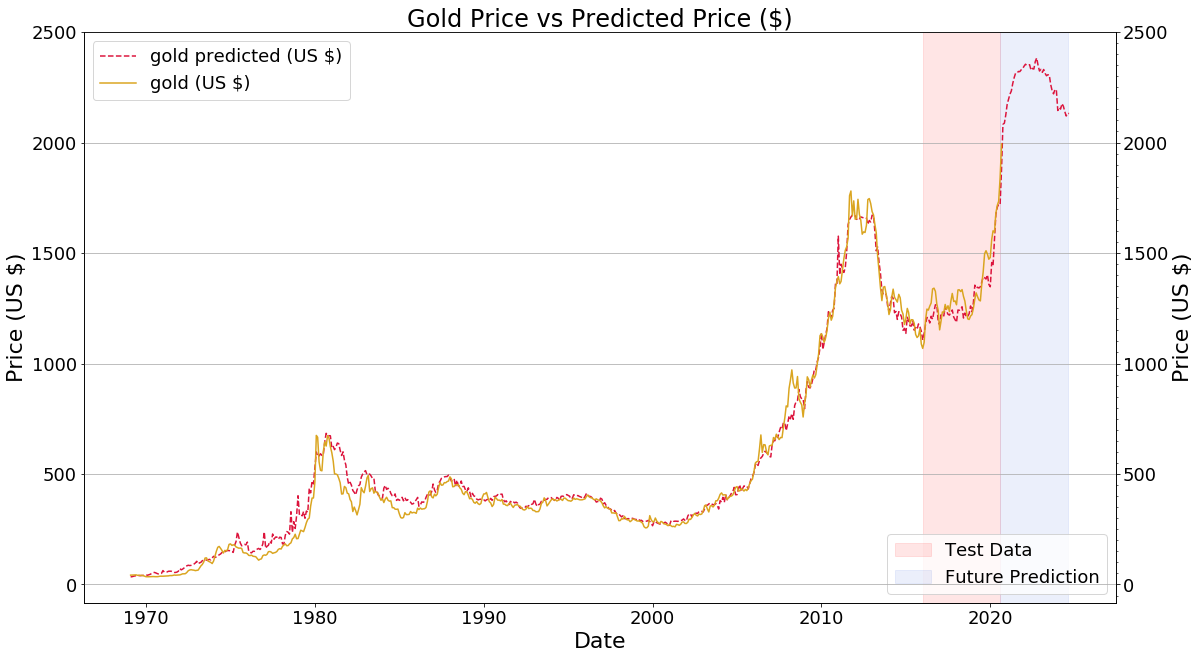

In [14]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = gold_col
k = 'gold_pred_error'
l = 'gold_pred'

ax1.plot(df_global.index, df_global[l], c='crimson', linestyle='dashed', alpha=0)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red', label='Test Data')
ax1.axvspan(dt.date(2020, 8, 1), dt.date(2024, 8, 1), alpha=0.1, color='royalblue', label='Future Prediction')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $)', c='crimson', linestyle='dashed')
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')

plt.title('Gold Price vs Predicted Price ($)')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=4)
ax2.legend(loc=2)
fig.set_size_inches(18.5, 10.5)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(50))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('Gold_Price_Prediction_Full_SGD.jpeg', dpi=300)

Text(0, 0.5, 'Price (US $)')

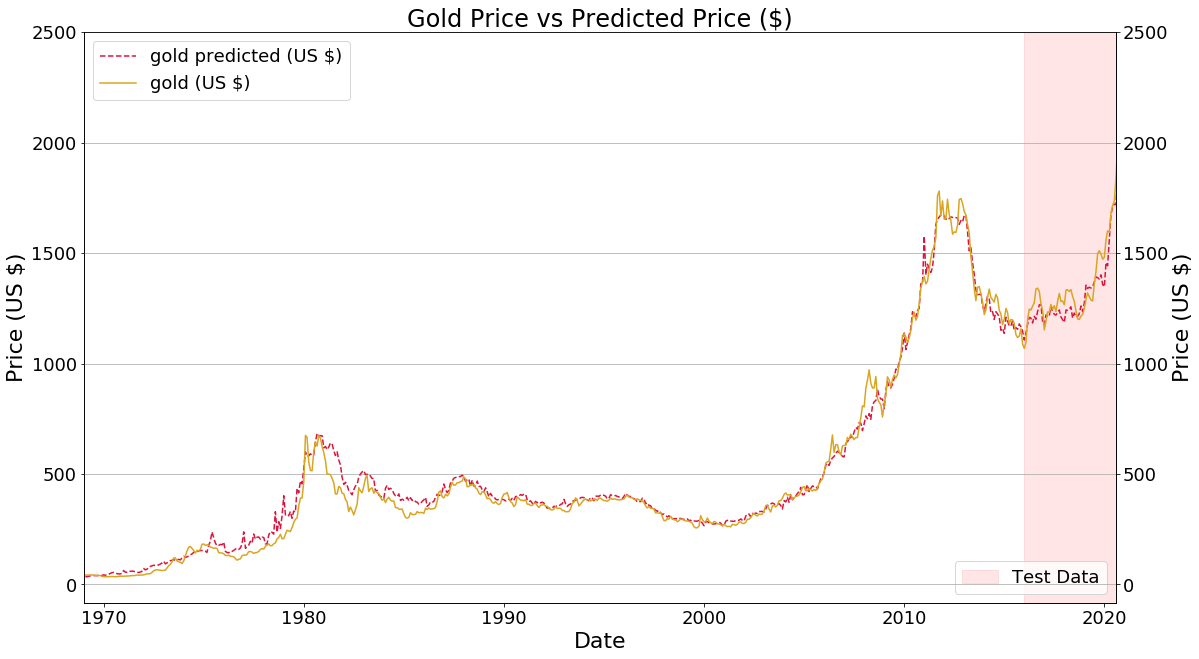

In [15]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = gold_col
k = 'gold_pred_error'
l = 'gold_pred'

ax1.plot(df_global.index, df_global[l], c='crimson', linestyle='dashed', alpha=0)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red', label='Test Data')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $)', c='crimson', linestyle='dashed')
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title('Gold Price vs Predicted Price ($)')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=4)
ax2.legend(loc=2)
fig.set_size_inches(18.5, 10.5)

"""years = mdates.YearLocator()   # every year
ax1.xaxis.set_major_locator(years)
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()  # every month
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(50))"""

ax1.set_xlim([dt.date(1969, 1, 1), dt.date(2020, 7, 31)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('Gold_Price_Prediction_Zoom_1969_2016_SGD.jpeg', dpi=300)

In [17]:
df_global.iloc[df_global.index == '2021-06-30']['gold_pred']

index
2021-06-30    2313.389404
Name: gold_pred, dtype: float32

In [18]:
## Calculate the mean absolute error and R2 scores for the predicted vs real test data.
print(f"Test data MAE score: {np.round(mean_absolute_error(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")

Test data MAE score: 122.0


Text(0, 0.5, 'Price (US $)')

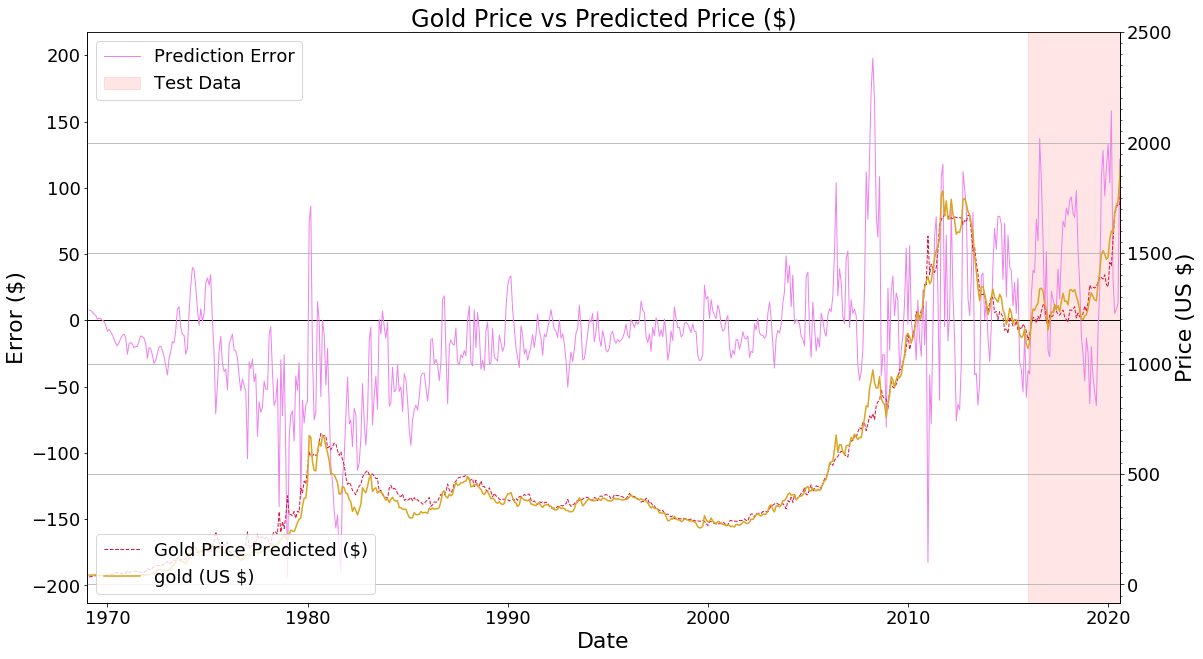

In [19]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

ax1.axhline(y=0, color='black', linewidth=1)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red', label='Test Data')
#ax1.axvspan(dt.date(2020, 8, 1), dt.date(2024, 8, 1), alpha=0.1, color='royalblue', label='Future Prediction')
ax2.plot(df_global.index, df_global[l], label='Gold Price Predicted ($)', c='crimson', linestyle='dashed', linewidth=1)
ax1.plot(df_global.index, df_global[k], label='Prediction Error', c='violet', linewidth=1)
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')

#ax1.ylim(0, 15)
plt.title('Gold Price vs Predicted Price ($)')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=3)
fig.set_size_inches(18.5, 10.5)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(50))

ax1.set_xlim([dt.date(1969, 1, 1), dt.date(2020, 7, 31)])
ax1.set_xlabel('Date')
ax1.set_ylabel('Error ($)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('Gold_Price_Prediction_Error_SGD.jpeg', dpi=300)

In [ ]:
"""High mid low case examination"""

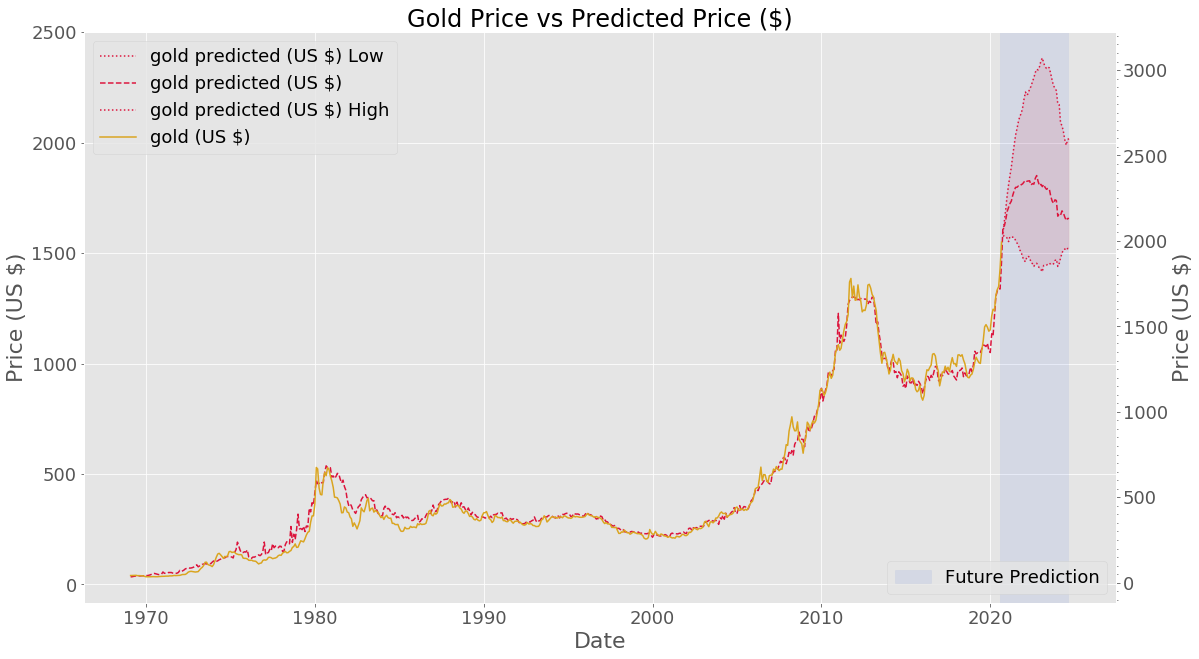

In [122]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = gold_col
k = 'gold_pred_error'
l = 'gold_pred'

ax1.plot(df_global.index, df_global[l], c='crimson', linestyle='dashed', alpha=0)

ax2 = ax1.twinx()
ax1.axvspan(dt.date(2020, 8, 1), dt.date(2024, 8, 1), alpha=0.1, color='royalblue', label='Future Prediction')
ax2.plot(df_global.index, df_global[l + '_low'], label='gold predicted (US $) Low', c='crimson', linestyle='dotted')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $)', c='crimson', linestyle='dashed')
ax2.plot(df_global.index, df_global[l + '_high'], label='gold predicted (US $) High', c='crimson', linestyle='dotted')
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')

ax2.fill_between(df_global.index, df_global[l + '_low'],  df_global[l + '_high'], alpha=0.1, color = 'crimson')


plt.title('Gold Price vs Predicted Price ($)')
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=4)
ax2.legend(loc=2)
fig.set_size_inches(18.5, 10.5)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(50))

"""years = mdates.YearLocator()   # every year
ax1.xaxis.set_major_locator(years)
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()  # every month
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(50))

ax1.set_xlim([dt.date(2007, 1, 1), dt.date(2024, 7, 31)])"""

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
plt.savefig('Gold_Price_Prediction_Full_AllData_HML.jpeg', dpi=600)

In [20]:
## Check for the directory and output the df_global dataframe.
if os.path.exists(os.path.join(os.getcwd(), "model_predictions")) is False:
    os.mkdir(os.path.join(os.getcwd(), "model_predictions"))
df_global.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions.csv"))

In [21]:
plt.style.use("ggplot")

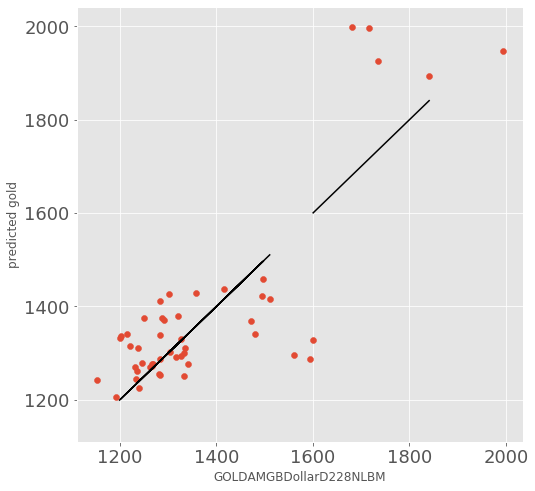

In [61]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df1.GOLDAMGBDollarD228NLBM, df1.gold_pred)
plt.plot(df1.GOLDAMGBDollarD228NLBM, df1.GOLDAMGBDollarD228NLBM, color="black")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

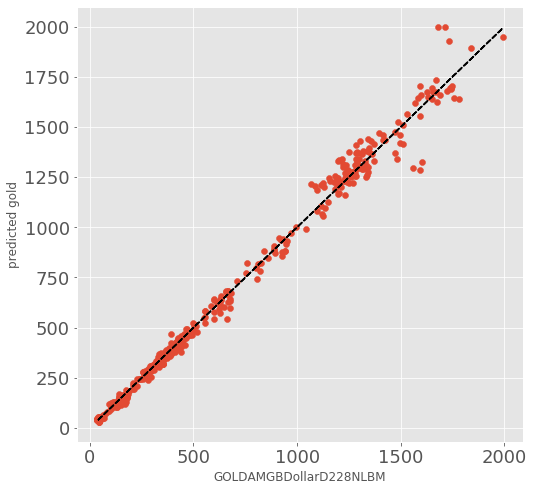

In [60]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df_global.GOLDAMGBDollarD228NLBM, df_global.gold_pred)
plt.plot(df_global.GOLDAMGBDollarD228NLBM, df_global.GOLDAMGBDollarD228NLBM, color="black", linestyle="--")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

In [267]:
plt.rcdefaults()

In [7]:
### OPTIMZING THE MODEL

In [288]:
optimizer_list = ['Adam', 'Nadam', 'SGD', 'RMSprop', 'Adagrad']
batch_size_list = [10, 20, 32, 64, 128, 256]

In [37]:
"""run_length = range(0, 100)

## Feature selection dataframes
#mae_df = pd.DataFrame(index=run_length, columns=parameter_list)
#loss_df = pd.DataFrame(index=run_length, columns=parameter_list)
#val_mae_df = pd.DataFrame(index=run_length, columns=parameter_list)
#val_loss_df = pd.DataFrame(index=run_length, columns=parameter_list)

#optimizer_df = pd.DataFrame(index=run_length, columns=optimizer_list)

## Shuffle the batch list
#batch_string_list = []
#for i in batch_size_list:
#    batch_string_list.append(str(i))
#batch_string_list
#batch_size_df = pd.DataFrame(index=run_length, columns=batch_string_list)

## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x.csv'), index_col=0).sample(frac=1, random_state=1)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y.csv'), index_col=0).sample(frac=1, random_state=1)
## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x.csv'), index_col=0).sample(frac=1, random_state=1)
test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y.csv'), index_col=0).sample(frac=1, random_state=1)

for i in run_length:
    count= i
    
    ## Use this section for feature importance calculation.
    #shuffle_list = parameter_list[:]
    #random.shuffle(shuffle_list)
    #rand_list = []
    #for i in range(randint(2, len(shuffle_list))):
    #    rand_list.append(shuffle_list.pop(randint(0, len(shuffle_list)-1)))

    ## Section to shuffle and select optimizer
    #shuffle_opt_list = optimizer_list[:]
    #random.shuffle(shuffle_opt_list)
    #rand_opt = shuffle_opt_list[0]
    #print("Batch number = " + rand_opt)
    ## Section to shuffle and select batch size
    #shuffle_batch_list = batch_size_list[:]
    #random.shuffle(shuffle_batch_list)
    #rand_batch = shuffle_batch_list[0]
    #print("Batch number = " + str(rand_batch))
    
    
    #Train_X = train_X
    #Test_x = test_x
    
    ## Initialise Scalars so that data is normalised to 1.
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    ## Normalise the data using the scalar.
    X_train = sc_x.fit_transform(Train_X)
    X_test = sc_x.transform(Test_x)

    y_train = sc_y.fit_transform(train_y)
    y_test = sc_y.transform(test_y)

    ## Calculate the number of input 'test' columns.
    input_neuron = len(Test_x.columns)
    
    print("run count = " + str(count))
    ## Setup the model for training, parameters here can and should be adjusted to create the best model.
    classifier = Sequential()
    classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = input_neuron))
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
    #classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))


    classifier.compile(optimizer = rand_opt, loss = 'mean_squared_error', metrics = ["mae"])
    
    ## '.fit' starts the training.
    history = classifier.fit(X_train, y_train, batch_size = 20, epochs = 10, validation_split= 0.1)""

    
    ## Use for optimizer and batch size
    #optimizer_df.at[count, rand_opt] = history.history['mae'][-1]
    #batch_size_df.at[count, str(rand_batch)] = history.history['mae'][-1]

    
    ## Used for feature selection
    #for i in rand_list:
    #    mae_df.at[count, i] = history.history['mae'][-1]
    #for i in rand_list:
    #    val_mae_df.at[count, i] = history.history['val_mae'][-1]
    #for i in rand_list:
    #    val_loss_df.at[count, i] = history.history['val_loss'][-1]
    #for i in rand_list:
    #    loss_df.at[count, i] = history.history['loss'][-1]"""

'run_length = range(0, 100)\n\n## Feature selection dataframes\n#mae_df = pd.DataFrame(index=run_length, columns=parameter_list)\n#loss_df = pd.DataFrame(index=run_length, columns=parameter_list)\n#val_mae_df = pd.DataFrame(index=run_length, columns=parameter_list)\n#val_loss_df = pd.DataFrame(index=run_length, columns=parameter_list)\n\n#optimizer_df = pd.DataFrame(index=run_length, columns=optimizer_list)\n\n## Shuffle the batch list\n#batch_string_list = []\n#for i in batch_size_list:\n#    batch_string_list.append(str(i))\n#batch_string_list\n#batch_size_df = pd.DataFrame(index=run_length, columns=batch_string_list)\n\n## Import the train and test dataframes. Drop the \'dateRep\' column as it is not need for the prediciton.\ntrain_X = pd.read_csv(os.path.join(data_path, "train", \'train_x.csv\'), index_col=0).sample(frac=1, random_state=1)\ntrain_y = pd.read_csv(os.path.join(data_path, "train", \'train_y.csv\'), index_col=0).sample(frac=1, random_state=1)\n## \'.sample\' randomises

In [242]:
model_path = os.path.join(os.getcwd(), "model")
#mae_df.to_csv(os.path.join(model_path, 'mae_df.csv'))
#loss_df.to_csv(os.path.join(model_path, 'loss_df.csv'))
#val_loss_df.to_csv(os.path.join(model_path, 'val_loss_df.csv'))
#val_mae_df.to_csv(os.path.join(model_path, 'val_mae_df.csv'))"""

## Optimizer and batch dataframes
#optimizer_df.to_csv(os.path.join(model_path, 'optimizer100_df.csv'))
#batch_size_df.to_csv(os.path.join(model_path, 'batch_size250_df.csv'))

In [291]:
mae_df = pd.read_csv(os.path.join(model_path, 'mae_df.csv'), index_col=0)
loss_df = pd.read_csv(os.path.join(model_path, 'loss_df.csv'), index_col=0)
val_mae_df = pd.read_csv(os.path.join(model_path, 'val_mae_df.csv'), index_col=0)
val_loss_df = pd.read_csv(os.path.join(model_path, 'val_loss_df.csv'), index_col=0)

In [292]:
optimizer_df = pd.read_csv(os.path.join(model_path, 'optimizer250_df.csv'), index_col=0)
batch_size_df = pd.read_csv(os.path.join(model_path, 'batch_size250_df.csv'), index_col=0)

In [293]:
names = ['fed debt % GDP', 'Ind. Production', 'Unemployment', 'Household Asset', 'Corp assets', 'Retail jobs', 'Gold prod' , 'Intr rate', 'Fed Debt', 'Vehicle Sales', 'New housing']
len(names)

11

In [294]:
mae_df_ = sc_y.inverse_transform(mae_df)
mae_df_transform = pd.DataFrame(mae_df_, columns=names)
mae_df_transform = mae_df_transform.loc[mae_df_transform.index < 251] 
mae_df_transform.tail()

opt_array = sc_y.inverse_transform(optimizer_df)
opt_df_transform = pd.DataFrame(opt_array, columns=optimizer_list)

batch_array = sc_y.inverse_transform(batch_size_df)
batch_df_transform = pd.DataFrame(batch_array, columns=batch_size_list)

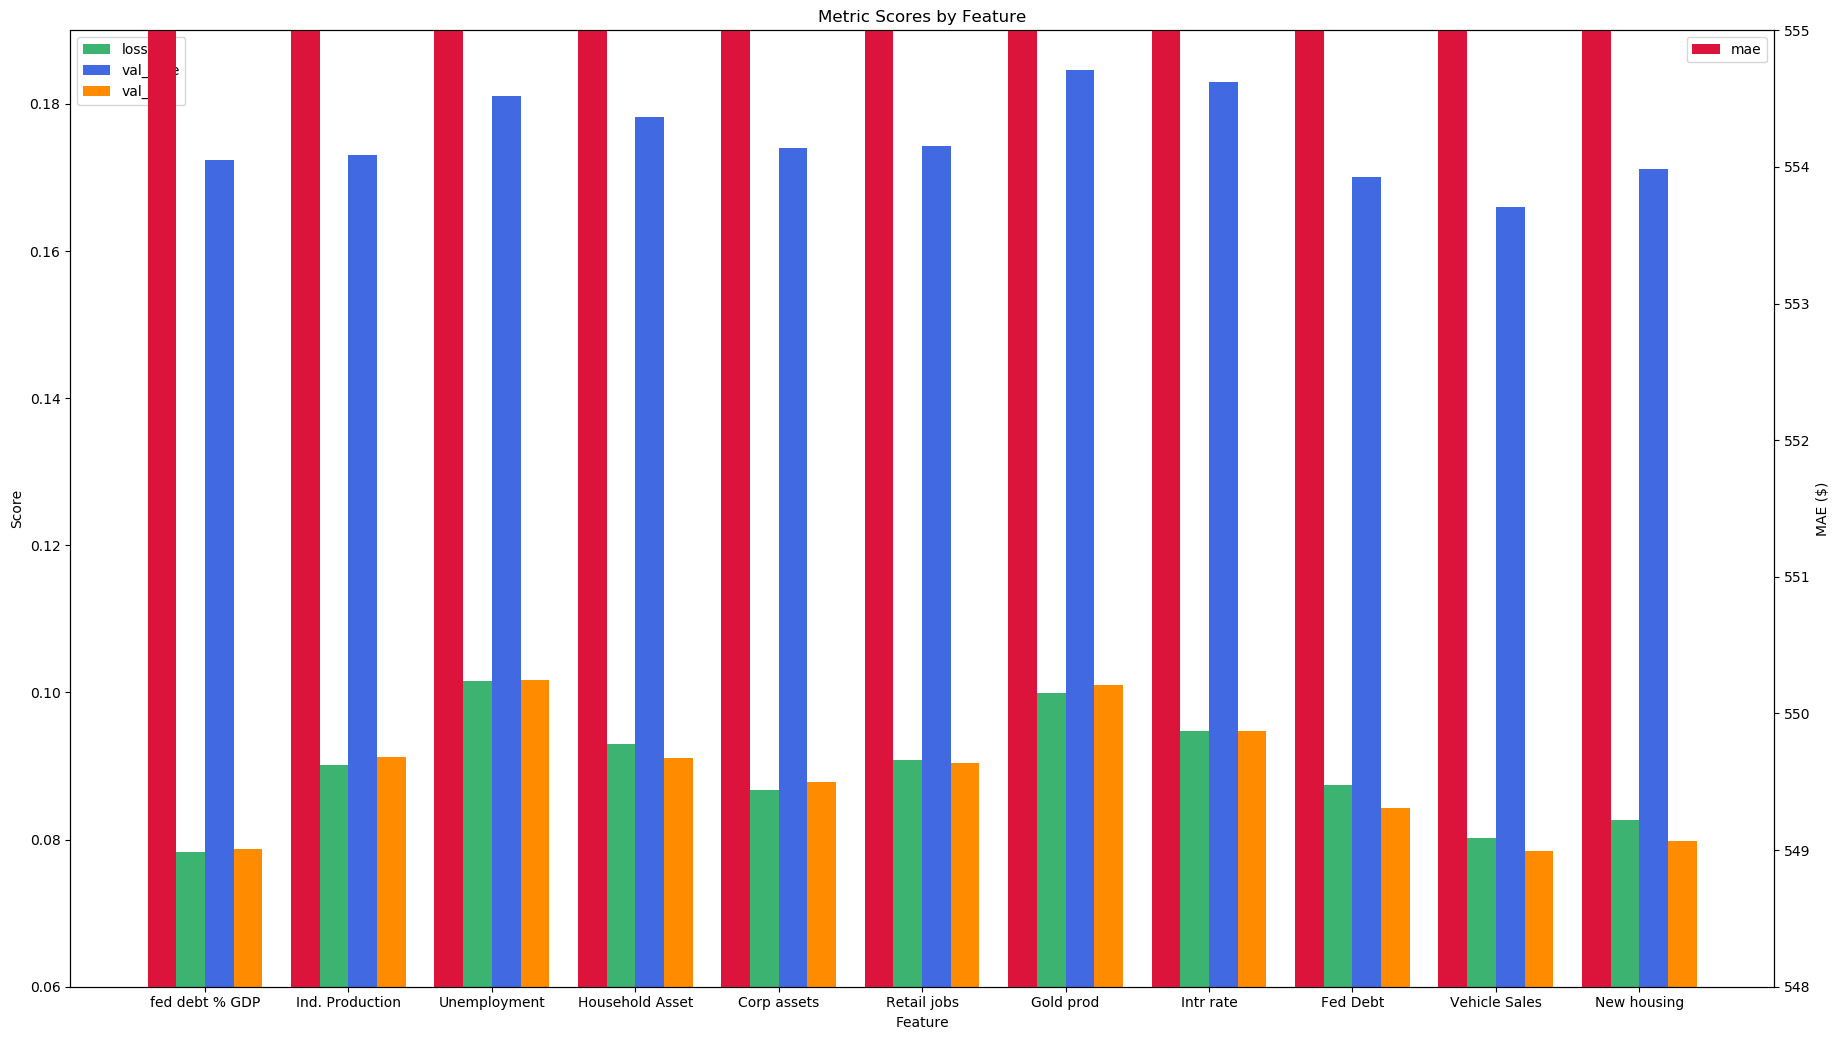

In [295]:
labels = names

x = np.arange(len(mae_df.columns))

width = 0.2  # the width of the bars

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

val1 = ax2.bar(x-width*1.5, list(mae_df_transform.mean()), width, label= 'mae', color='crimson')
val2 = ax1.bar(x-width*0.5, list(loss_df.mean()), width, label= 'loss', color='mediumseagreen')
val3 = ax1.bar(x+width*0.5, list(val_mae_df.mean()), width, label= 'val_mae', color='royalblue')
val4 = ax1.bar(x+width*1.5, list(val_loss_df.mean()), width, label= 'val_loss', color='darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Score')
ax1.set_xlabel('Feature')
ax1.set_title('Metric Scores by Feature')
ax1.set_xticks(x)
ax1.set_xticklabels(names)
ax1.set_ylim([0.06, 0.19])

#plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)

ax2.set_ylabel('MAE ($)')
ax2.set_ylim([548, 555])

# ADD THIS LINE
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
#ax2.grid(None)

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()

plt.savefig('MAE_Feature_Score_dpi600.jpeg', dpi=600,bbox_inches = 'tight')

In [304]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 18,
         'axes.labelsize': 22,
         'axes.titlesize': 24,
         'xtick.labelsize': 12,
         'ytick.labelsize': 18}
plt.rcParams.update(params)

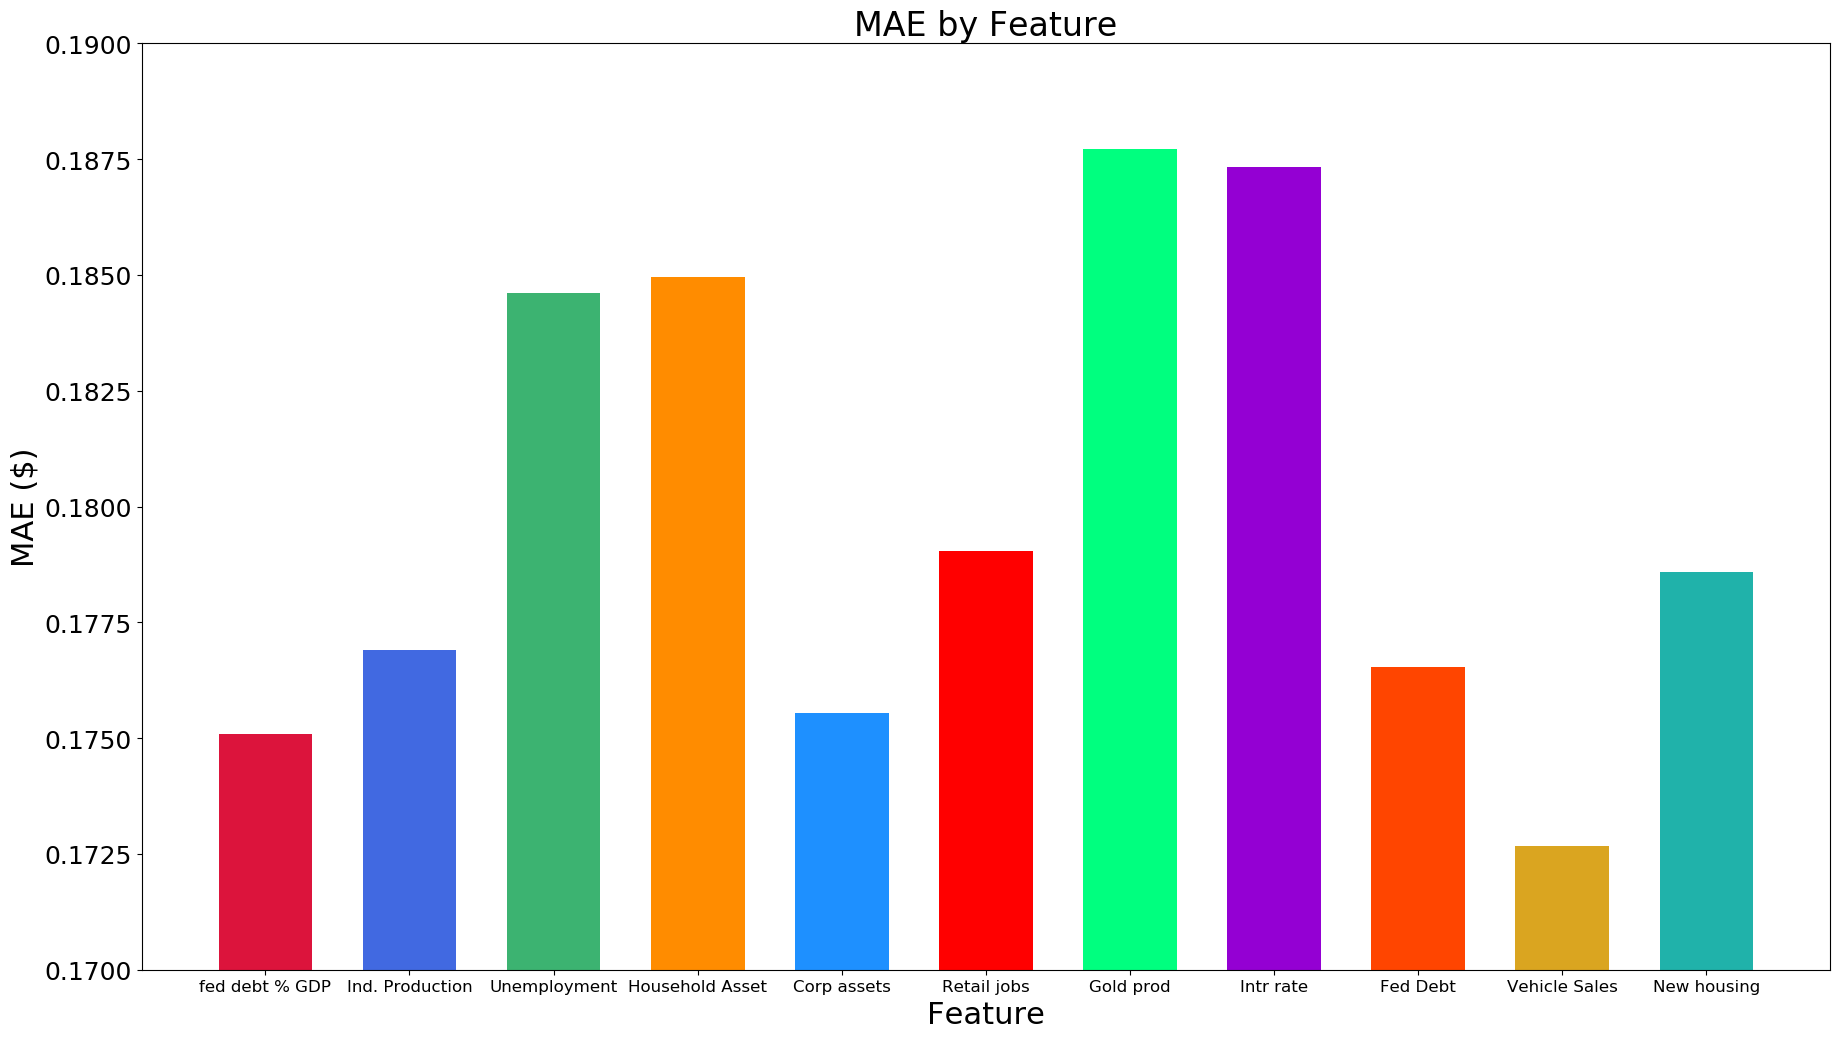

In [305]:
labels = names

x = np.arange(len(mae_df.columns))

width = 0.65  # the width of the bars

fig, ax1 = plt.subplots()


val1 = ax1.bar(x, list(mae_df.mean()), width, label= 'mae', color=['crimson', 'royalblue', 'mediumseagreen', 'darkorange',  'dodgerblue', 'red', 'springgreen', 'darkviolet', 'orangered', 'goldenrod', 'lightseagreen'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('MAE ($)')
ax1.set_xlabel('Feature')
ax1.set_title('MAE by Feature')
ax1.set_xticks(x)
ax1.set_xticklabels(names)
ax1.set_ylim([0.17, 0.19])

#plt.grid()
#ax1.legend(loc=2)

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()

plt.savefig('MAE_Feature_dpi600.jpeg', dpi=600,bbox_inches = 'tight')

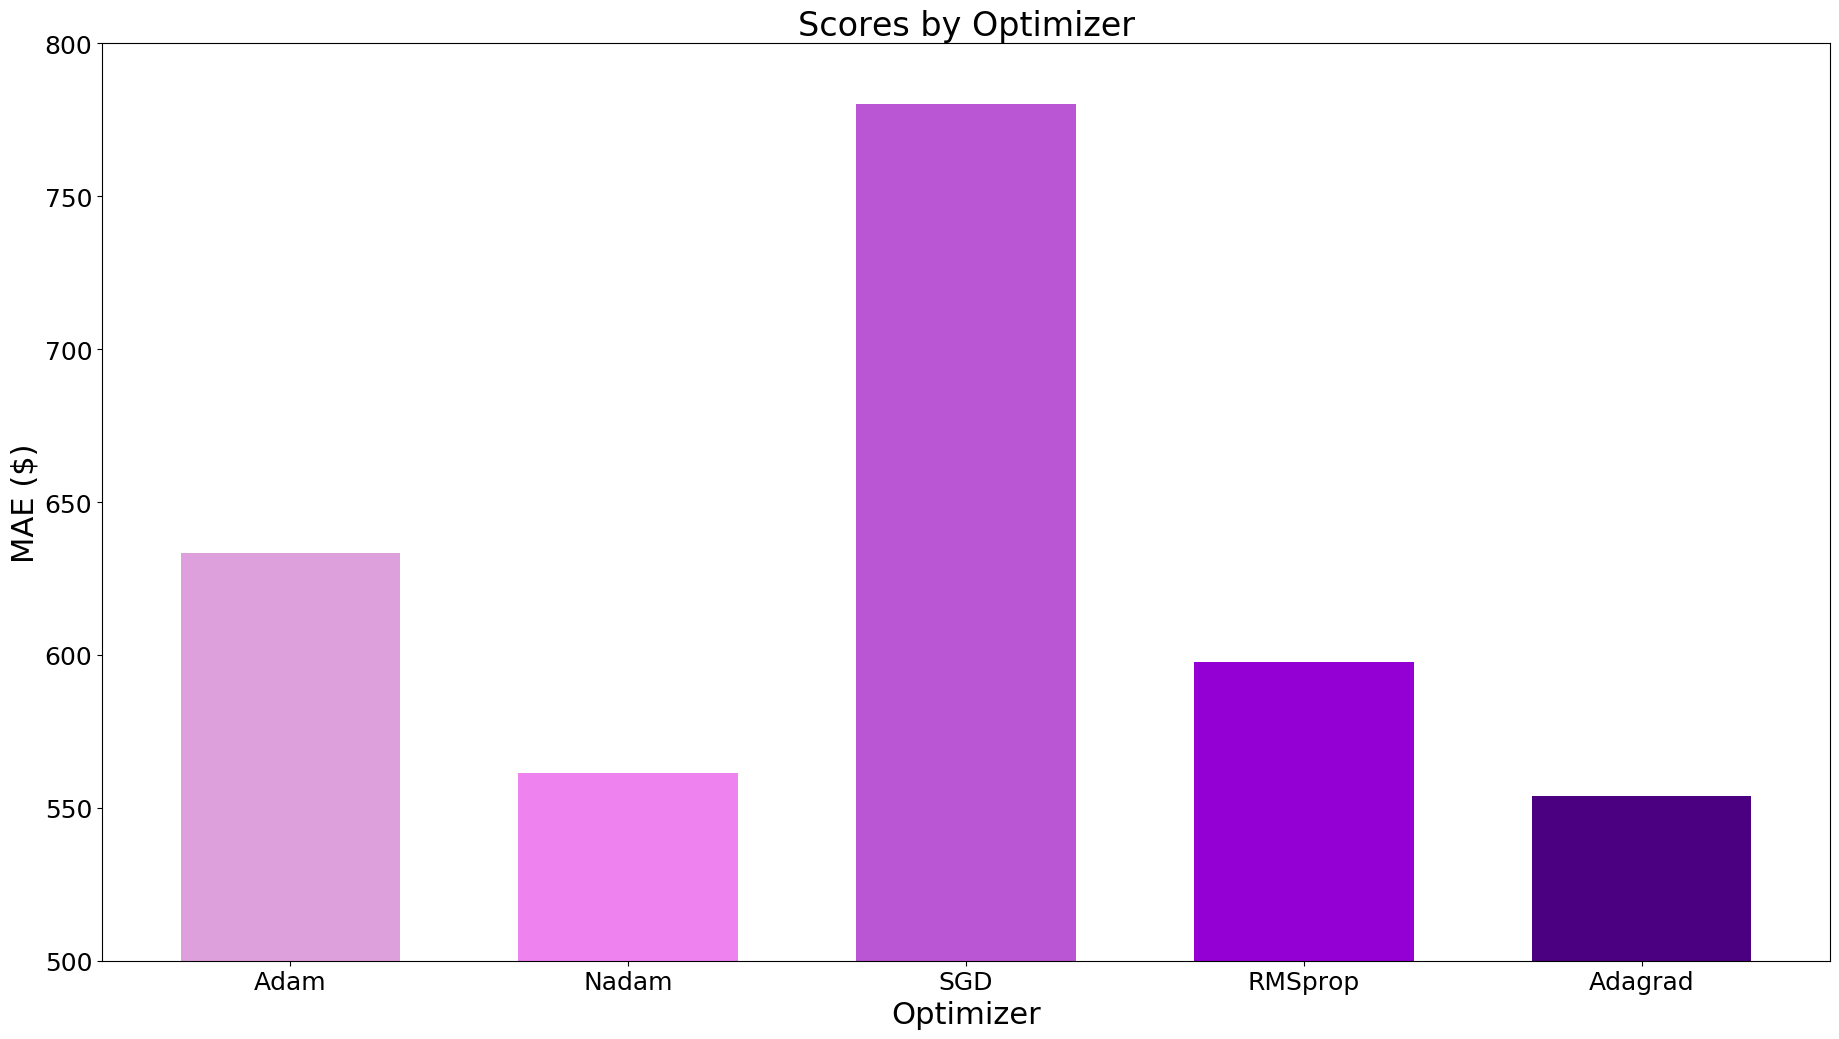

In [300]:
labels = optimizer_list

x = np.arange(len(opt_df_transform.columns))

width = 0.65  # the width of the bars

fig, ax1 = plt.subplots()


val1 = ax1.bar(x, list(opt_df_transform.mean()), width, color=['plum', 'violet', 'mediumorchid', 'darkviolet',  'Indigo'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('MAE ($)')
ax1.set_xlabel('Optimizer')
ax1.set_title('Scores by Optimizer')
ax1.set_xticks(x)
ax1.set_xticklabels(optimizer_list)
ax1.set_ylim([500, 800])

#plt.grid()

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()

plt.savefig('MAE_Optimizer_dpi600.jpeg', dpi=600,bbox_inches = 'tight')

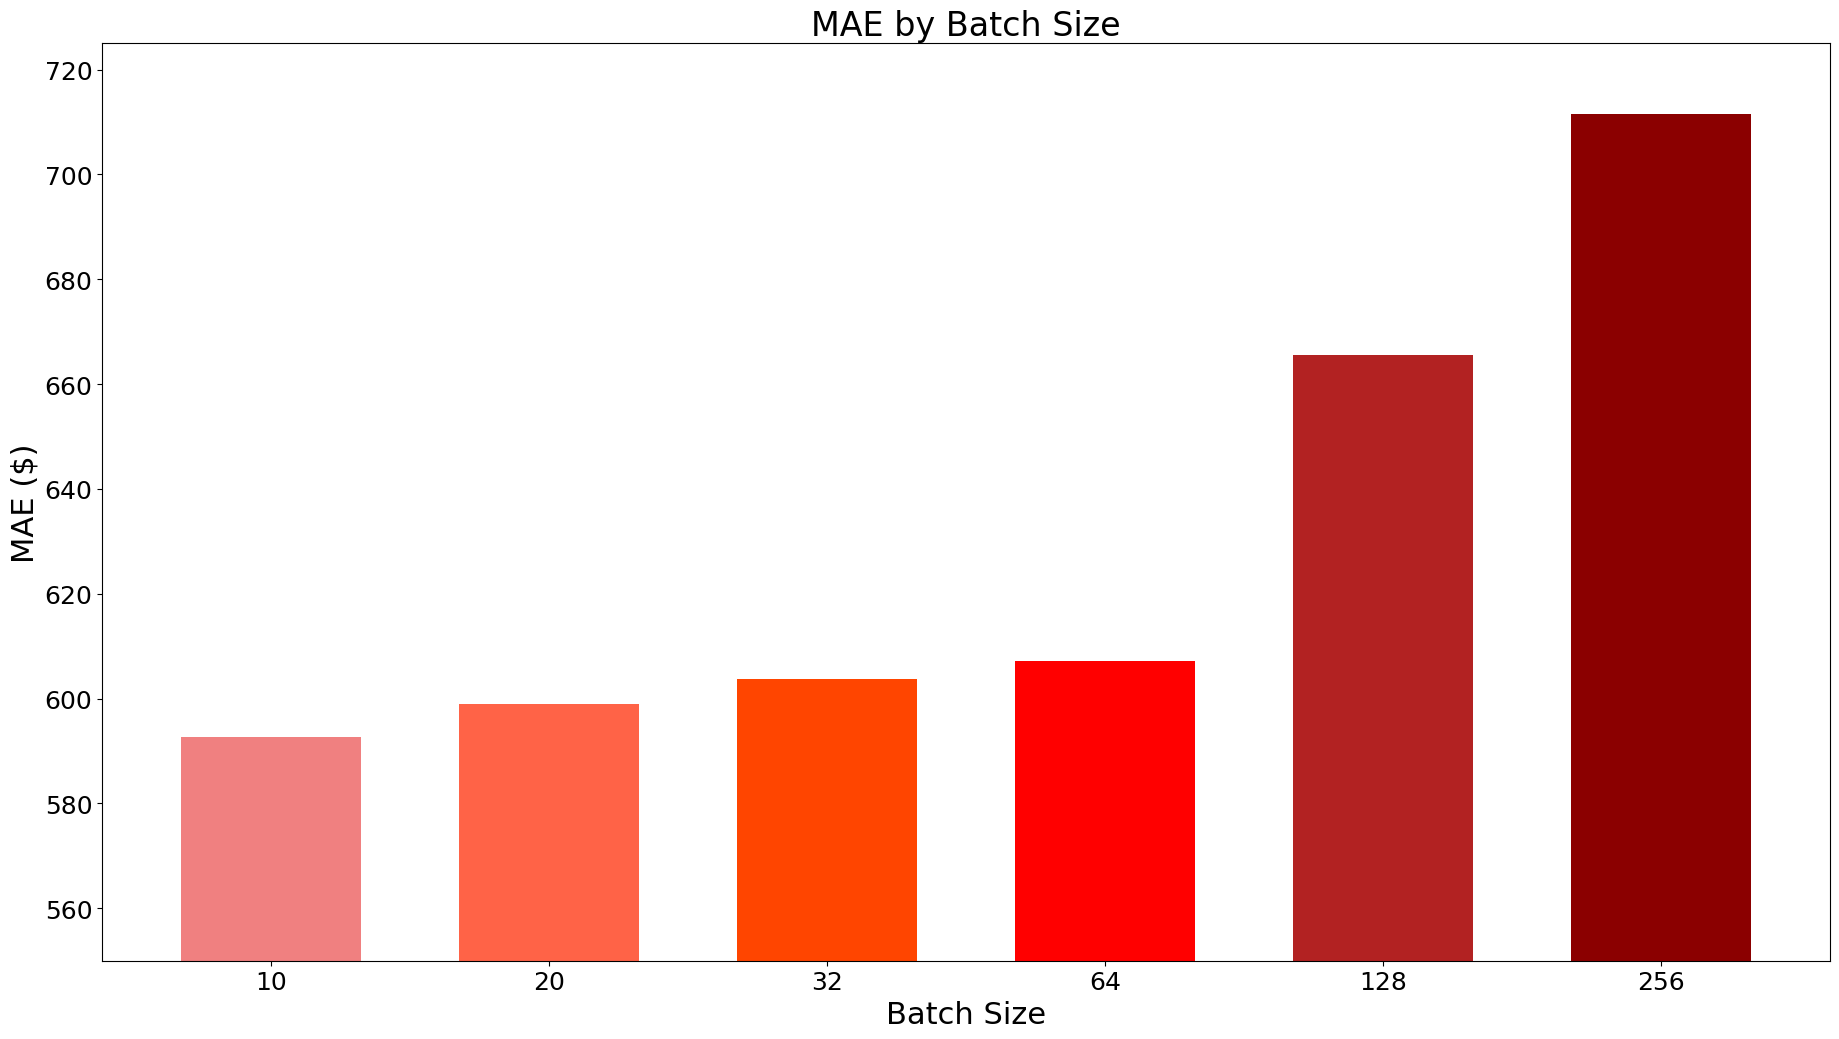

In [301]:
labels = batch_size_list

x = np.arange(len(batch_df_transform.columns))

width = 0.65  # the width of the bars

fig, ax1 = plt.subplots()


val1 = ax1.bar(x, list(batch_df_transform.mean()), width, color=['lightcoral', 'tomato', 'orangered', 'red', 'firebrick',  'darkred'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('MAE ($)')
ax1.set_xlabel('Batch Size')
ax1.set_title('MAE by Batch Size')
ax1.set_xticks(x)
ax1.set_xticklabels(batch_size_list)
ax1.set_ylim([550, 725])

#plt.grid()

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()

plt.savefig('MAE_Batch_Size_dpi600.jpeg', dpi=600,bbox_inches = 'tight')